In [9]:
sql = """select 
  date, 
  institute, 
  category, 
  sum(value) as value
from mortgages 
where strftime('%Y', date) > "2008" and date <= (
  select max(date) as max_date from mortgages where institute = 'bank' union
  select max(date) as max_date from mortgages where institute = 'pension' union
  select max(date) as max_date from mortgages where institute = 'other' order by max_date limit 1)  
group by date, institute, category 
order by date, institute, category"""

In [10]:
from urllib.parse import urlencode
import pandas

In [11]:
url = "https://sedlabanki-housing-mtckiezzpq-lz.a.run.app/housing.csv?" + urlencode({"sql": sql})

In [12]:
series = pandas.read_csv(url, parse_dates=['date'])

<Figure size 840x560 with 0 Axes>

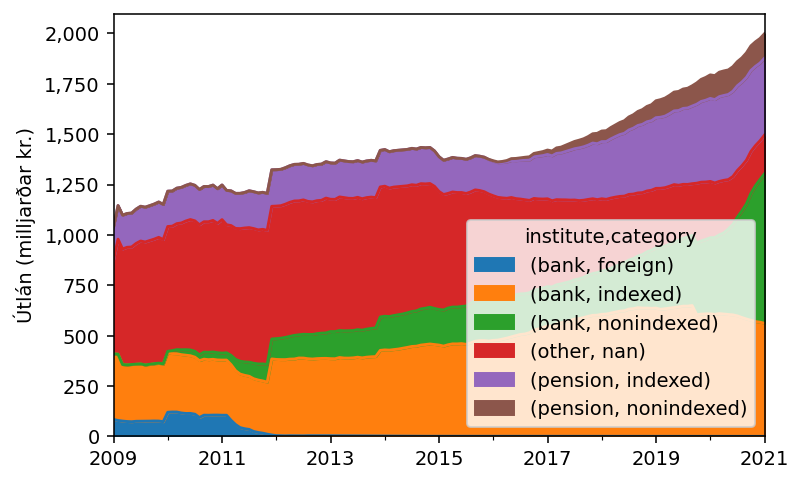

In [13]:
from matplotlib.ticker import FuncFormatter

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 140

df = series.pivot(index="date", columns=("institute","category"), values="value")
fig = plt.figure()
ax = df.plot.area(stacked=True)
ax.set_ylabel("Útlán (milljarðar kr.)")
ax.set_xlabel(None)

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y / 1_000_000_000:,.0f}')) 

